In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/shionguha/inf2178-expdesignfordatascience-w23/main/project%20dataset/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv")


# Midterm

## Data Preprocessing


In [ ]:
df.shape

(65276, 25)

In [ ]:
# check out content in the dataframe
df.head(20)


,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5
5,2021,Apr-June,1019145,6060688.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,42,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,6
6,2021,Jan-Mar,1035445,6053833.0,330778,Black,M,Aged 25 to 34 years,Not a youth,52,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,7
7,2021,Jan-Mar,1050464,6063477.0,330778,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,8
8,2021,Jan-Mar,1045486,6053929.0,330778,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,9
9,2021,Apr-June,1012287,6004570.0,330778,Black,M,Aged 25 to 34 years,Not a youth,14,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,10


In [ ]:
# checking for null value numebr and data type
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65276 entries, 0 to 65275
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Arrest_Year                      65276 non-null  int64  
 1   Arrest_Month                     65276 non-null  object 
 2   EventID                          65276 non-null  int64  
 3   ArrestID                         64807 non-null  float64
 4   PersonID                         65276 non-null  int64  
 5   Perceived_Race                   65272 non-null  object 
 6   Sex                              65276 non-null  object 
 7   Age_group__at_arrest_            65252 non-null  object 
 8   Youth_at_arrest__under_18_years  65276 non-null  object 
 9   ArrestLocDiv                     65276 non-null  object 
 10  StripSearch                      65276 non-null  int64  
 11  Booked                           65276 non-null  int64  
 12  Occurrence_Categor

In [ ]:
# hence we interesting in the overall pattern, information such as eventID, ArrestID can be droped
df. drop(df.columns[[2,3,4,-1]],axis =1, inplace = True)
df.head()

,Arrest_Year,Arrest_Month,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,...,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound
0,2020,July-Sept,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,...,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN
1,2020,July-Sept,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
2,2020,Oct-Dec,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
3,2021,Jan-Mar,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
4,2021,Jan-Mar,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN


### Treating data type


In [ ]:
# we found some column can be converted to type that are easier to be handled
df["Sex"].unique()
df["Youth_at_arrest__under_18_years"].unique()
df["StripSearch"].unique()
df["ItemsFound"].unique()
df["ArrestLocDiv"].unique()

array(['54', 'XX', '42', '52', '14', '51', '53', '31', '11', '12', '13',
       '41', '22', '55', '43', '23', '33', '32'], dtype=object)

In [ ]:
# categorize "Youth_at_arrest__under_18_years" colume by 1 for under 17, 0 for not under 
df["Youth_at_arrest__under_18_years"].replace(['Youth (aged 17 and younger)',
       'Youth (aged 17 years and under)'],1, inplace = True)
df["Youth_at_arrest__under_18_years"].replace('Not a youth',0, inplace = True)

### Treating NULL

In [ ]:
df.isnull().sum()


Arrest_Year                            0
Arrest_Month                           0
Perceived_Race                         4
Sex                                    0
Age_group__at_arrest_                 24
Youth_at_arrest__under_18_years        0
ArrestLocDiv                           0
StripSearch                            0
Booked                                 0
Occurrence_Category                  165
Actions_at_arrest___Concealed_i        0
Actions_at_arrest___Combative__        0
Actions_at_arrest___Resisted__d        0
Actions_at_arrest___Mental_inst        0
Actions_at_arrest___Assaulted_o        0
Actions_at_arrest___Cooperative        0
SearchReason_CauseInjury           57475
SearchReason_AssistEscape          57475
SearchReason_PossessWeapons        57475
SearchReason_PossessEvidence       57475
ItemsFound                         57475
dtype: int64

In [ ]:
# checking for variable names
df["Perceived_Race"].unique()
df["Occurrence_Category"].unique()
#df["Age_group__at_arrest_"].unique()

array(['Assault & Other crimes against persons', 'Harassment/Threatening',
       'FTA/FTC/Compliance Check/Parollee', 'Assault', 'Robbery/Theft',
       'Sexual Related Crime', 'Mischief & Fraud', 'Warrant',
       'Police Category - Administrative', 'Robbery & Theft',
       'FTA/FTC, Compliance Check & Parollee', 'Drug Related', 'Weapons',
       'Vehicle Related (inc. Impaired)', 'Other Offence',
       'Harassment & Threatening', 'Weapons & Homicide',
       'Break and Enter', 'Mischief', 'Break & Enter',
       'Sexual Related Crimes & Crimes Against Children',
       'Crimes against Children', 'Police Category - Incident', 'Fraud',
       'LLA', 'Mental Health', 'Other Statute', 'Vehicle Related',
       'Other Statute & Other Incident Type', 'Impaired', 'Homicide', nan],
      dtype=object)

In [ ]:
# replace all null value with unknown in race and age group column
df["Perceived_Race"].replace([np.nan],"Unknown or Legacy", inplace = True)
df["Age_group__at_arrest_"].replace([np.nan],"Unknown", inplace = True)
df["Occurrence_Category"].replace([np.nan],"Unknown", inplace = True)

# replace all null value with 0 for all search reason
df.replace([np.nan],0, inplace = True)

In [ ]:
df.isnull().sum()

Arrest_Year                        0
Arrest_Month                       0
Perceived_Race                     0
Sex                                0
Age_group__at_arrest_              0
Youth_at_arrest__under_18_years    0
ArrestLocDiv                       0
StripSearch                        0
Booked                             0
Occurrence_Category                0
Actions_at_arrest___Concealed_i    0
Actions_at_arrest___Combative__    0
Actions_at_arrest___Resisted__d    0
Actions_at_arrest___Mental_inst    0
Actions_at_arrest___Assaulted_o    0
Actions_at_arrest___Cooperative    0
SearchReason_CauseInjury           0
SearchReason_AssistEscape          0
SearchReason_PossessWeapons        0
SearchReason_PossessEvidence       0
ItemsFound                         0
dtype: int64

In [ ]:
list(df.columns)


['Arrest_Year',
 'Arrest_Month',
 'Perceived_Race',
 'Sex',
 'Age_group__at_arrest_',
 'Youth_at_arrest__under_18_years',
 'ArrestLocDiv',
 'StripSearch',
 'Booked',
 'Occurrence_Category',
 'Actions_at_arrest___Concealed_i',
 'Actions_at_arrest___Combative__',
 'Actions_at_arrest___Resisted__d',
 'Actions_at_arrest___Mental_inst',
 'Actions_at_arrest___Assaulted_o',
 'Actions_at_arrest___Cooperative',
 'SearchReason_CauseInjury',
 'SearchReason_AssistEscape',
 'SearchReason_PossessWeapons',
 'SearchReason_PossessEvidence',
 'ItemsFound']

In [ ]:
# according to the website there cases where search happened but is not recorded by booked
for index, row in df.iterrows():
  if row['StripSearch'] == 1:
    row['Booked'] = 1
  

In [ ]:
df_without_XX = df[df['ArrestLocDiv'] != "XX"]
df_strip_wXX = df_without_XX[df_without_XX['StripSearch'] == 1]

Text(0.5, 0.98, 'Case count for different sex in divisions')

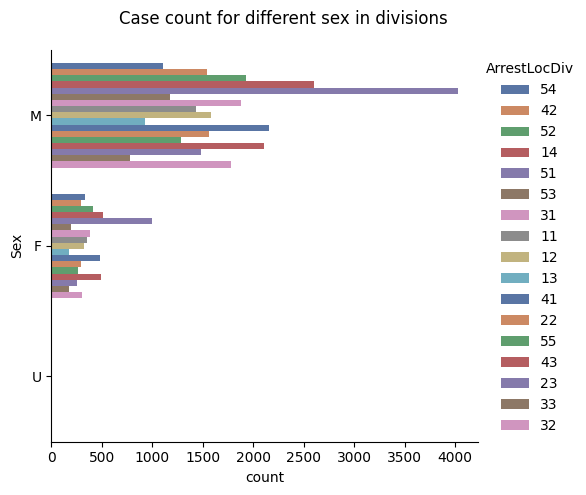

In [ ]:
# catplot for distribution of ArrestLoc categorized by sex


sa = sns.catplot(y="Sex", hue="ArrestLocDiv", kind="count",
            palette="deep",
            data=df_without_XX, )


sa.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
sa.fig.suptitle('Case count for different sex in divisions')


Text(0.5, 0.98, 'Distribution of case count in divisons categorized by whether a strip search occurred')

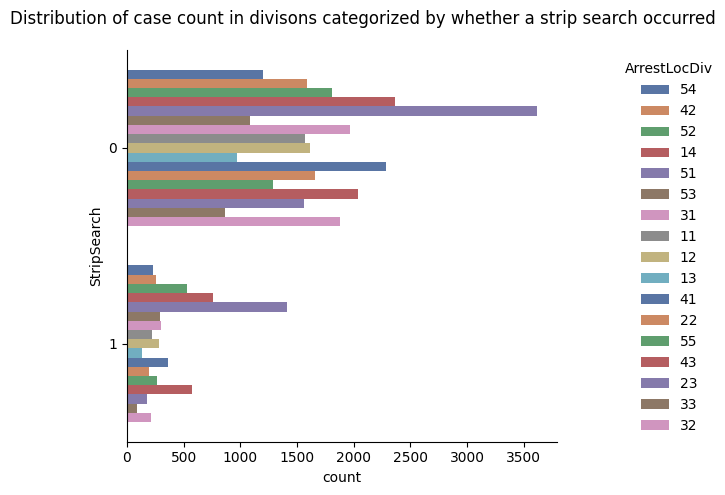

In [ ]:
# catplot for distribution of ArrestLoc categorized by strip search
StA = sns.catplot(y="StripSearch", hue="ArrestLocDiv", kind="count",
            palette="deep",
            data=df_without_XX)

StA.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
StA.fig.suptitle('Distribution of case count in divisons categorized by whether a strip search occurred')

In [ ]:
# catplot for distribution of Perceived_Race categorized by StripSearch
StR = sns.catplot(y="StripSearch", hue="Perceived_Race", kind="count",
            palette="deep",
            data=df_without_XX)
StR.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
StR.fig.suptitle('Distribution of case count between races categorized by whether a strip search occurred')

In [ ]:
total_rows = len(df_without_XX[df_without_XX['StripSearch'] == 1])

# Filter the rows where StripSearch is 1 and Race is either White or Black
filtered_df = df_without_XX[(df_without_XX['StripSearch'] == 1) & (df_without_XX['Perceived_Race'] == 'Black')]

# Calculate the number of rows that meet the above condition
selected_rows = len(filtered_df)

# Calculate the proportion
proportion = selected_rows / total_rows

# Print the proportion
print(proportion)

In [ ]:
# catplot for distribution of StripSearch categorized by Youth_at_arrest__under_18_years
ya = sns.catplot(y="Youth_at_arrest__under_18_years", hue="ArrestLocDiv", kind="count",
            palette="deep",
            data=df_without_XX)
ya.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
ya.fig.suptitle('Distribution of case count between divisons categorized by whether underaged')

In [ ]:
# catplot for distribution of StripSearch categorized by Youth_at_arrest__under_18_years
ASt = sns.catplot(y="Arrest_Year", hue="StripSearch", kind="count",
            palette="deep",
            data=df_without_XX)
ASt.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
ASt.fig.suptitle('Distribution of case count by wheter a search conducted between two years')

It seems like change year does affect the number for strip search, and the number also affect by the division.


In [ ]:
# Further divide the data into category by measure like sex and year
df_male = df_strip_wXX[df_strip_wXX['Sex'] == 'M']
df_female = df_strip_wXX[df_strip_wXX['Sex'] == 'F']

df_male_20 = df_male[df_male['Arrest_Year'] == 2020]
df_male_21 = df_male[df_male['Arrest_Year'] == 2021]
df_female_20 = df_female[df_female['Arrest_Year'] == 2020]
df_female_21 = df_female[df_female['Arrest_Year'] == 2021]

In [ ]:
df_male_20_loc = df_male_20.groupby('ArrestLocDiv')
df_male_21_loc = df_male_21.groupby('ArrestLocDiv')
df_female_20_loc = df_female_20.groupby('ArrestLocDiv')
df_female_21_loc = df_female_21.groupby('ArrestLocDiv')
df_male_20_loc.head(10)

In [ ]:
# for 2020 and 2021 exmain the stripseach number for all divions by Male and Female
df_male_20_num = pd.DataFrame({'StripNum_20_M': df_male_20_loc['StripSearch'].count()})
df_male_21_num = pd.DataFrame({'StripNum_21_M': df_male_21_loc['StripSearch'].count()})
df_female_20_num = pd.DataFrame({'StripNum_20_F': df_female_20_loc['StripSearch'].count()})
df_female_21_num = pd.DataFrame({'StripNum_21_F': df_female_21_loc['StripSearch'].count()})


merged_df_num = pd.merge(pd.merge(df_male_20_num, df_male_21_num, on='ArrestLocDiv', how='outer'),
                        pd.merge(df_female_20_num, df_female_21_num, on='ArrestLocDiv', how='outer'),
                        on='ArrestLocDiv', how='outer').reset_index()


merged_df_num.head(20)
#print(merged_df_num.columns)

In [ ]:
merged_df_num.describe()

In [ ]:
#fig, ax = plt.subplots(nrows = 2, ncols = 2)

den = sns.displot(data=merged_df_num, kind='kde', fill=True, height=5, aspect=1.5)
den.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
den.fig.suptitle('Density distribution of search number between years and sex')

In [ ]:
melt_df_num = pd.melt(merged_df_num, id_vars=['ArrestLocDiv'], var_name='StripType', value_name='StripNum')
melt_df_num.head(20)

In [ ]:
# examine correlation for strip number and division
melt_df_num.ArrestLocDiv = melt_df_num.ArrestLocDiv.astype('int64')
correlate = melt_df_num['StripNum'].corr(melt_df_num['ArrestLocDiv'])
print(correlate)

In [ ]:
sns.catplot(x='ArrestLocDiv', y='StripNum', hue='StripType', data=melt_df_num, kind='bar', height=6, aspect=1.5, palette='muted')

### lets take a closer look on it and spread out the specific reason for search

In [ ]:
df_51 = df_without_XX[df_without_XX['ArrestLocDiv'] == '51']

df_striped_A = df_strip_wXX[df_strip_wXX['SearchReason_CauseInjury'] == 1]
df_striped_grouped_A = df_striped_A.groupby('ArrestLocDiv')
df_search_A = pd.DataFrame({'CauseInjury': df_striped_grouped_A['SearchReason_CauseInjury'].count()})

df_striped_B = df_strip_wXX[df_strip_wXX['SearchReason_AssistEscape'] == 1]
df_striped_grouped_B = df_striped_B.groupby('ArrestLocDiv')
df_search_B = pd.DataFrame({'AssistEscape': df_striped_grouped_B['SearchReason_AssistEscape'].count()})

df_striped_C = df_strip_wXX[df_strip_wXX['SearchReason_PossessWeapons'] == 1]
df_striped_grouped_C = df_striped_C.groupby('ArrestLocDiv')
df_search_C = pd.DataFrame({'PossessWeapons': df_striped_grouped_C['SearchReason_PossessWeapons'].count()})

df_striped_D = df_strip_wXX[df_strip_wXX['SearchReason_PossessEvidence'] == 1]
df_striped_grouped_D = df_striped_D.groupby('ArrestLocDiv')
df_search_D = pd.DataFrame({'PossessEvidence': df_striped_grouped_D['SearchReason_PossessEvidence'].count()})

merged_df_striped = pd.merge(pd.merge(df_search_A, df_search_B, on='ArrestLocDiv', how='outer'),
                        pd.merge(df_search_C, df_search_D, on='ArrestLocDiv', how='outer'),
                        on='ArrestLocDiv', how='outer').reset_index()


merged_df_striped.head(20)

#print(df_without_XX['SearchReason_PossessWeapons'].count())

In [ ]:
merged_df_striped.describe()

In [ ]:
melt_df_striped = pd.melt(merged_df_striped, id_vars=['ArrestLocDiv'], var_name='StripType', value_name='StripNum')
melt_df_striped.head()


In [ ]:
cat = sns.catplot(x='ArrestLocDiv', y='StripNum', hue='StripType', data=melt_df_striped, kind='bar', height=6, aspect=1.5, palette='muted')
cat.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
cat.fig.suptitle('Search number distribution by specific search reason across all divisons')

In [ ]:
box = sns.catplot(data=melt_df_striped, kind="box", x="StripType", y="StripNum", 
            palette="deep",height=5, aspect=2)
box.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
box.fig.suptitle('box plot for each search type')

Question 1: Does divisons affect the number of stripseasrch conduncted and would sex or change in year vary the result with the Toronto Divisons.

In [ ]:
# add two summed columns for analzing relation between year and strip number

col_20 = ['StripNum_20_M', 'StripNum_20_F']
col_21 = ['StripNum_21_M', 'StripNum_21_F']
merged_df_num['StripNum_20'] = merged_df_num[col_20].sum(1)
merged_df_num['StripNum_21'] = merged_df_num[col_21].sum(1)

merged_df_num.head(20)

## T test:

First hypothesis for question 1 

H0: The number of people being searched is identical between year 2020 and 2021.

H1: There are difference between the number of people being searched for 2020 and 2021

In [ ]:
print('Ttest results for stripnumebr:',stats.ttest_ind(merged_df_num['StripNum_20'], merged_df_num['StripNum_21'], equal_var=False))


In [ ]:

#calculate mean and standard deviation of groups 
#those with less than 3 in family show higher mean average score 
print('Mean number for people get searched for 2020',merged_df_num['StripNum_20'].mean(), 'for and 2021:', merged_df_num['StripNum_21'].mean())
print('Standard deviation for people get searched for 2020:',merged_df_num['StripNum_20'].std(),'for and 2021:', merged_df_num['StripNum_21'].std())

In [ ]:
#degrees of freedom code for Welch test 
#code from https://pythonfordatascienceorg.wordpress.com/welch-t-test-python-pandas/ (values checked against R output)

def welch_dof(x, y): 
    '''
    Takes in final grades for binary features
    Returns degrees of freedom 
    '''
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
    return dof

In [ ]:
# compute confidence interval 
import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(merged_df_num['StripNum_20']), sms.DescrStatsW(merged_df_num['StripNum_21']))
print('Confidence interval for sex:',cm.tconfint_diff(usevar='unequal'))

In [ ]:
#welch dof 
print('DOF for search number:',welch_dof(merged_df_num['StripNum_20'], merged_df_num['StripNum_21']))

Second hypothesis for question 1 

H0: The number of people being searched is identical between male and female.

H1: There are difference between the number of people being searched for male and female

In [ ]:
col_M = ['StripNum_20_M', 'StripNum_21_M']
col_F = ['StripNum_20_F', 'StripNum_21_F']
merged_df_num['StripNum_M'] = merged_df_num[col_M].sum(1)
merged_df_num['StripNum_F'] = merged_df_num[col_F].sum(1)
merged_df_num.head(20)

In [ ]:
print('Ttest results for stripnumebr:',stats.ttest_ind(merged_df_num['StripNum_M'], merged_df_num['StripNum_F'], equal_var=False))

In [ ]:
#calculate mean and standard deviation of groups 
#those with less than 3 in family show higher mean average score 
print('Mean number for people get searched for male',merged_df_num['StripNum_M'].mean(), 'for and female:', merged_df_num['StripNum_F'].mean())
print('Standard deviation for people get searched for male:',merged_df_num['StripNum_M'].std(),'for and female:', merged_df_num['StripNum_F'].std())

In [ ]:
# compute confidence interval 
cm = sms.CompareMeans(sms.DescrStatsW(merged_df_num['StripNum_M']), sms.DescrStatsW(merged_df_num['StripNum_F']))
print('Confidence interval for sex:',cm.tconfint_diff(usevar='unequal'))

In [ ]:
#welch dof 
print('DOF for search number:',welch_dof(merged_df_num['StripNum_M'], merged_df_num['StripNum_F']))

## One-way ANOVA for the Second hypothesis:

H0: The means for people being searched are identical for all divisons.

H1: The means for people being searched are different for all divisons.

In [ ]:
# grouping the strip search number by division
df_div_anova = melt_df_striped.drop('StripType', axis=1)
df_div_anova = df_div_anova.groupby('ArrestLocDiv')


divisions = []
n_strip_searched = []
for name, group in df_div_anova:
    divisions.append(name)
    n_strip_searched.append(group['StripNum'].values)

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*n_strip_searched)

# Print results
print('One-way ANOVA')
print('=============')
print(f'F-statistic: {f_statistic:.2f}')
print(f'p-value: {p_value}')


In [ ]:
# we perfrom the tukey's hsd test for further analysis
tukey = pairwise_tukeyhsd(endog=melt_df_striped['StripNum'],
                          groups=melt_df_striped['ArrestLocDiv'].astype('int64'),
                          alpha=0.05)
                          
print(tukey)           

## Two-way ANOVA

We see that from hypothesis one, year do not directly relate to the number of strip seach conducted and there is a observed statistical significant between division and strip seach number. We can now use two-way ANOVA to examine how year and division act together on the strip search numebr.

## Hypothesis A:

H0: Group means of people get searched base on divisions are identical, for males and females.

H1: Groups means of people get searched base on divisions are different, for males and females.

## Hypothesis B:

H0: Group means of people get searched for males and females are identical, base on divisions.

H1: Group means of people get searched for males and females are different, base on divisions.




In [ ]:
df_M = df_without_XX[df_without_XX['Sex'] == 'M']
df_F = df_without_XX[df_without_XX['Sex'] == 'F']

df_M = df_M[df_M['StripSearch'] == 1]
df_F = df_F[df_F['StripSearch'] == 1]

df_M_loc = df_M.groupby('ArrestLocDiv')
df_F_loc = df_F.groupby('ArrestLocDiv')

df_M_num = pd.DataFrame({'StripNum': df_M_loc['StripSearch'].count()}).reset_index()
df_F_num = pd.DataFrame({'StripNum': df_F_loc['StripSearch'].count()}).reset_index()

df_M_num['Sex'] = 'M'
df_F_num['Sex'] = 'F'

melt_df_sex = df_M_num.append(df_F_num, ignore_index = True)
'''
merged_sex_df_num = pd.merge(df_M_num,
                        df_F_num,
                        on='ArrestLocDiv').reset_index()

melt_df_sex = pd.melt(merged_sex_df_num, id_vars=['ArrestLocDiv'], var_name='Sex', value_name='StripNum')
'''
#melt_df_sex['ArrestLocDiv:Sex'] = melt_df_sex['ArrestLocDiv'] + ':' + melt_df_sex['Sex']
#merged_sex_df_num.head(20)
melt_df_sex.head(40)
#melt_df_sex.corr()
#melt_df_sex.info()
#melt_df_sex.info()

In [ ]:
df_20 = df_without_XX[df_without_XX.Arrest_Year == 2020]
df_21 = df_without_XX[df_without_XX.Arrest_Year == 2021]

df_20_M = df_20[df_20['Sex'] == 'M']
df_20_F = df_20[df_20['Sex'] == 'F']

df_20_M_strip = df_20_M[df_20_M['StripSearch'] == 1]
df_20_F_strip = df_20_F[df_20_F['StripSearch'] == 1]

df_20_M_sc = pd.DataFrame({'StripNum': df_20_M_strip.groupby('ArrestLocDiv')['StripSearch'].count()}).reset_index()
df_20_F_sc = pd.DataFrame({'StripNum': df_20_F_strip.groupby('ArrestLocDiv')['StripSearch'].count()}).reset_index()




df_21_M = df_21[df_21['Sex'] == 'M']
df_21_F = df_21[df_21['Sex'] == 'F']


df_21_M_strip = df_21_M[df_21_M['StripSearch'] == 1]
df_21_F_strip = df_21_F[df_21_F['StripSearch'] == 1]

df_21_M_sc = pd.DataFrame({'StripNum': df_21_M_strip.groupby('ArrestLocDiv')['StripSearch'].count()}).reset_index()
df_21_F_sc = pd.DataFrame({'StripNum': df_21_F_strip.groupby('ArrestLocDiv')['StripSearch'].count()}).reset_index()


dfa= df_20_M_sc
dfa["Year"] = 2020
dfa["Sex"] = 'M'

dfb= df_20_F_sc
dfb["Year"] = 2020
dfb["Sex"] = 'F'

dfc= df_21_M_sc
dfc["Year"] = 2021
dfc["Sex"] = 'M'

dfd= df_21_F_sc
dfd["Year"] = 2021
dfd["Sex"] = 'F'

df_2020 = dfa.append(dfb, ignore_index = True)
df_2021 = dfc.append(dfd, ignore_index = True)

df_anova = df_2020.append(df_2021, ignore_index = True)

df_anova.head()

In [ ]:

model1 = ols('StripNum ~ C(ArrestLocDiv) + C(Sex) + C(ArrestLocDiv):C(Sex)', data= df_anova).fit()
model1.summary()
sm.stats.anova_lm(model1, typ=2)


In [ ]:
model2 = ols('StripNum ~ C(ArrestLocDiv) + C(Year) + C(ArrestLocDiv):C(Year)', data= df_anova).fit()
model2.summary()
sm.stats.anova_lm(model2, typ=2)

In [ ]:
model2 = ols('StripNum ~ C(Sex) + C(Year) + C(Sex):C(Year)', data= df_anova).fit()
model2.summary()
sm.stats.anova_lm(model2, typ=2)

In [ ]:
Sex = df_anova['Sex']
StripNum = df_anova['StripNum'].values

fig, ax = plt.subplots(figsize=(13, 6))

# x axis (Perceived Race), trace (year), dependent variable (Cooperative mean value)
fig = interaction_plot(df_anova['ArrestLocDiv'], Sex, StripNum, colors=['red','blue'], markers=['D','^'], ms=10, ax=ax)

plt.ylabel('Strip Search Counts')
plt.xlabel('Divisons')
plt.title('Interaction Plot to show Strip Search Counts by Division and Sex', fontweight='bold')
plt.show()

In [ ]:
'''from scipy.stats import f_oneway

grouped_data = melt_df_year.groupby(['ArrestLocDiv', 'Year'])['StripNum']

# Perform the two-way ANOVA
f_value, p_value = f_oneway(*[grouped_data.get_group(group) for group in grouped_data.groups])

# Print the F-value and p-value
print('F-value:', f_value)
print('p-value:', p_value)
'''

In [ ]:
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
from matplotlib.pyplot import figure

In [ ]:
pip install datascience

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# create a dataframe from the table
df = pd.DataFrame({
    'ArrestLocDiv': ['11', '12', '13', '14', '22', '23', '31', '32', '33', '41', '42', '43', '51', '52', '53', '54', '55'],
    'StripNum_20_M': [725, 819, 444, 1248, 786, 716, 916, 956, 381, 1086, 766, 1123, 2009, 983, 542, 541, 665],
    'StripNum_21_M': [709, 760, 482, 1354, 773, 764, 964, 829, 396, 1068, 781, 987, 2016, 945, 637, 566, 618],
    'StripNum_20_F': [183, 164, 89, 251, 135, 126, 190, 152, 93, 237, 135, 286, 500, 213, 91, 156, 121],
    'StripNum_21_F': [172, 159, 86, 264, 155, 132, 196, 151, 85, 249, 164, 211, 498, 199, 106, 174, 148]
})

# set the index of the dataframe to ArrestLocDiv
df = df.set_index('ArrestLocDiv')

# create the bar plot
ax = df.plot(kind='bar', rot=0, figsize=(10, 6))

# set the title and axis labels
ax.set_title('Number of Male and Female Strip Searches by ArrestLocDiv', fontsize=16)
ax.set_xlabel('ArrestLocDiv', fontsize=14)
ax.set_ylabel('Number of Strip Searches', fontsize=14)

# show the plot
plt.show()

## Part two


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/shionguha/inf2178-expdesignfordatascience-w23/main/project%20dataset/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv")

In [ ]:
df_year=df[['Arrest_Year',"Actions_at_arrest___Concealed_i","Actions_at_arrest___Combative__","Actions_at_arrest___Resisted__d","Actions_at_arrest___Mental_inst","Actions_at_arrest___Assaulted_o","Actions_at_arrest___Cooperative"]]
df_year=pd.melt(df_year,id_vars='Arrest_Year',var_name="Action_at_arrest",value_name="Frequency")
df_year=df_year.groupby(['Arrest_Year','Action_at_arrest']).sum().reset_index()
df_year.head()

In [ ]:
sns.barplot(data=df_year, x="Frequency", y="Action_at_arrest",hue="Arrest_Year",ci=None).set(title='Frequency for different years\' actions at arrest by category')

In [ ]:
df_oc_t=df[['Occurrence_Category','Actions_at_arrest___Cooperative']]
df_oc_t=df_oc_t.groupby(['Occurrence_Category']).sum().reset_index()
df_oc_t.head(20)

In [ ]:
df_oc=df[['Occurrence_Category','Arrest_Month','Actions_at_arrest___Cooperative']]
df_oc=df_oc.groupby(['Occurrence_Category','Arrest_Month']).sum().reset_index()
df_oc.head(20)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(data=df_oc, x="Actions_at_arrest___Cooperative", y="Occurrence_Category",hue="Arrest_Month",ci=None).set(title='Frequency for cooperative action at arrest by occurrence category',xlabel="Actions_at_arrest___Cooperative Frequency")

In [ ]:
table = pd.pivot_table(df_oc, values='Actions_at_arrest___Cooperative', index=['Occurrence_Category'],columns=['Arrest_Month'], aggfunc=np.sum)
table.describe()


In [ ]:
table.head()

In [ ]:
table1 = pd.pivot_table(df_oc, values='Actions_at_arrest___Cooperative', index=['Arrest_Month'],columns=['Occurrence_Category'], aggfunc=np.sum)
table1.describe()


In [ ]:
treatment = df_oc[df_oc['Occurrence_Category'] == 'Assault']['Actions_at_arrest___Cooperative']
control = df_oc[df_oc['Occurrence_Category'] == 'FTA/FTC, Compliance Check & Parollee']['Actions_at_arrest___Cooperative']
t_statistic, p_value = stats.ttest_ind(treatment, control)

print("T-Statistic: ", t_statistic)
print("P-Value: ", p_value)

In [ ]:
model = ols('Actions_at_arrest___Cooperative ~ Occurrence_Category', data=df_oc).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
print(aov_table)

In [ ]:
import statsmodels.stats.multicomp as mc
tukey = mc.pairwise_tukeyhsd(df_oc['Actions_at_arrest___Cooperative'], df_oc['Occurrence_Category'])
print(tukey.summary())

In [ ]:
Arrest_Month = df_oc['Arrest_Month']
frequency = df_oc['Actions_at_arrest___Cooperative'].values
fig, ax = plt.subplots(figsize=(30, 7))

# x axis (Perceived Race), trace (year), dependent variable (Cooperative mean value)
fig = interaction_plot(df_oc['Occurrence_Category'], Arrest_Month, frequency,ax=ax)
plt.ylabel('Cooperative action frequency')
plt.xlabel('Occurrence Category')
plt.xticks(rotation=90)
plt.title('Interaction plot to show cooperative action at arrest by occurrence category and arrest period')
plt.show()

# Final


## EDA


In [ ]:
df_without_XX.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,0,54,...,0,0,0,1,0.0,0.0,0.0,0.0,0.0,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,0,54,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,0,54,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3
5,2021,Apr-June,1019145,6060688.0,327535,South Asian,M,Aged 25 to 34 years,0,42,...,0,0,0,1,0.0,0.0,0.0,0.0,0.0,6
6,2021,Jan-Mar,1035445,6053833.0,330778,Black,M,Aged 25 to 34 years,0,52,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,7


Text(0.5, 0.98, 'Distribution of case count between races categorized by whether a strip search occurred')

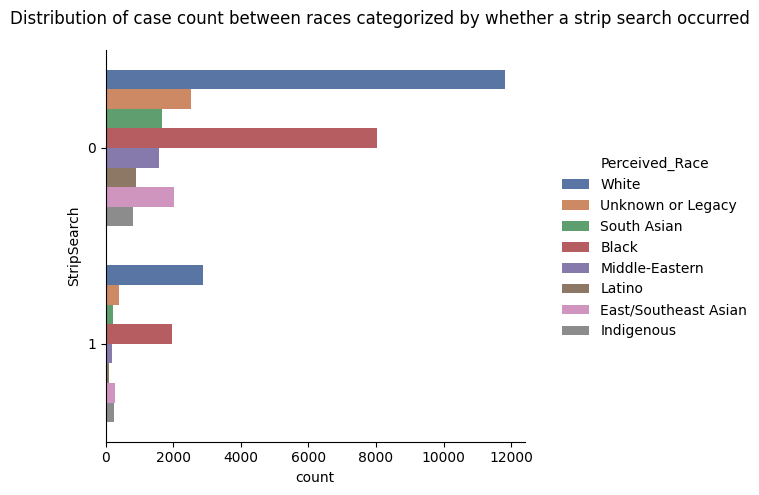

In [ ]:
StR = sns.catplot(y="StripSearch", hue="Perceived_Race", kind="count",
            palette="deep",
            data=df_without_XX)
StR.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
StR.fig.suptitle('Distribution of case count between races categorized by whether a strip search occurred')

Text(0.5, 0.98, 'Distribution of case count for each gender by whether a strip search occurred')

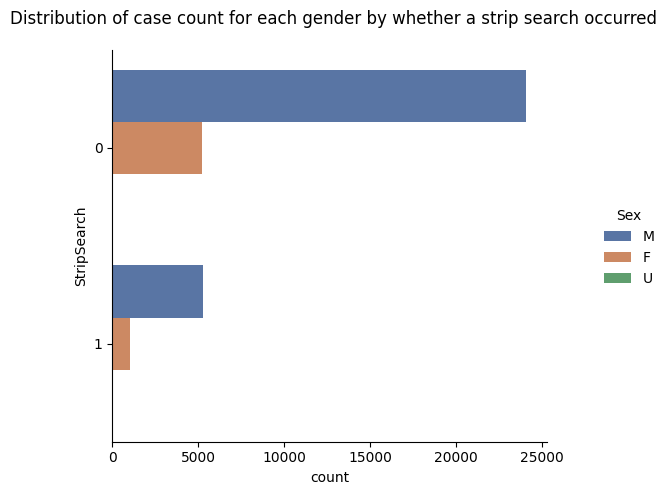

In [ ]:
StR = sns.catplot(y="StripSearch", hue="Sex", kind="count",
            palette="deep",
            data=df_without_XX)
StR.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
StR.fig.suptitle('Distribution of case count for each gender by whether a strip search occurred')

Text(0.5, 0.98, 'Distribution of case count between arrest location divisions by whether a strip search occurred')

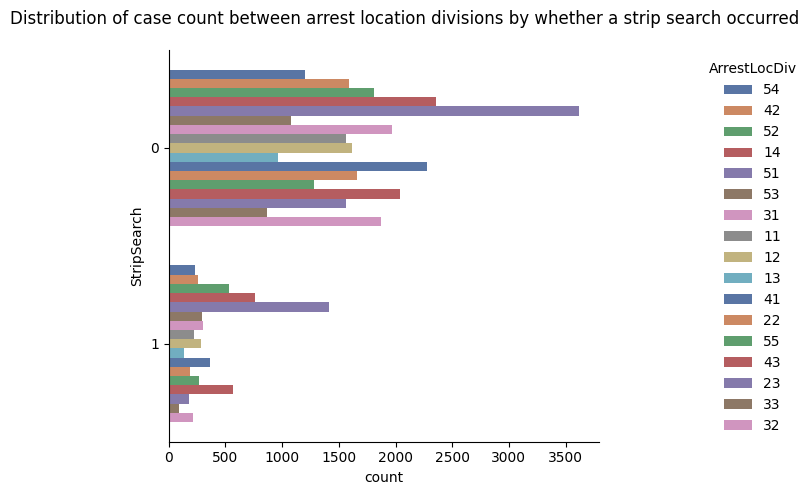

In [ ]:
StR = sns.catplot(y="StripSearch", hue="ArrestLocDiv", kind="count",
            palette="deep",
            data=df_without_XX)
StR.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
StR.fig.suptitle('Distribution of case count between arrest location divisions by whether a strip search occurred')

Text(0.5, 0.98, 'Distribution of case count between arrest location divisions by whether items are found in strip search')

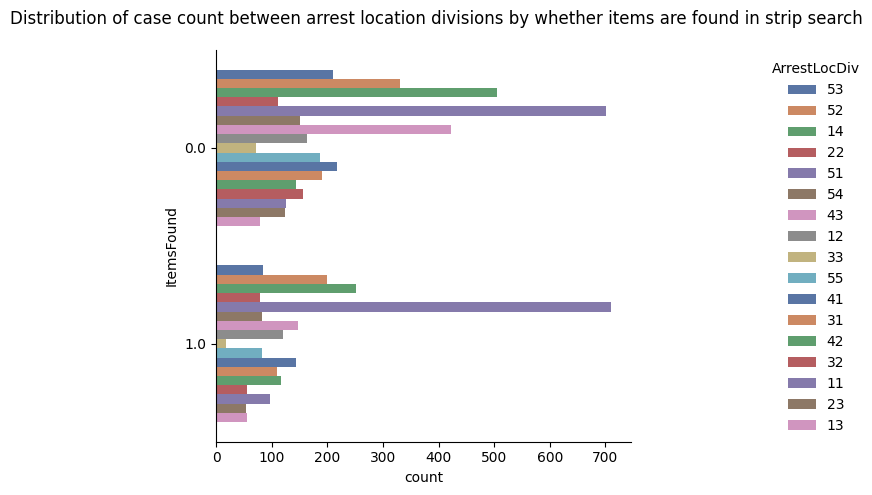

In [ ]:
df_x=df_without_XX[df_without_XX["StripSearch"]==1].copy()
StR = sns.catplot(y="ItemsFound", hue="ArrestLocDiv", kind="count",
            palette="deep",
            data=df_x)
StR.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
StR.fig.suptitle('Distribution of case count between arrest location divisions by whether items are found in strip search')

Text(0.5, 0.98, 'Distribution of case count between occurrence categorized by whether a strip search occurred')

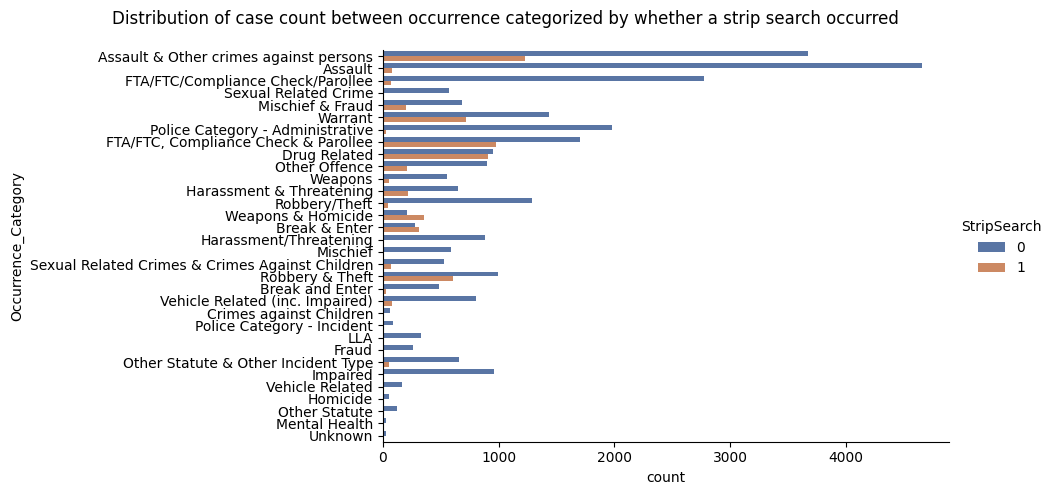

In [ ]:
StR = sns.catplot(y="Occurrence_Category", hue="StripSearch", kind="count",
            palette="deep",
            data=df_without_XX,height=5,aspect=2)
StR.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
StR.fig.suptitle('Distribution of case count between occurrence categorized by whether a strip search occurred')

Text(0.5, 0.98, 'Distribution of case count for youth or not by whether a strip search occurred')

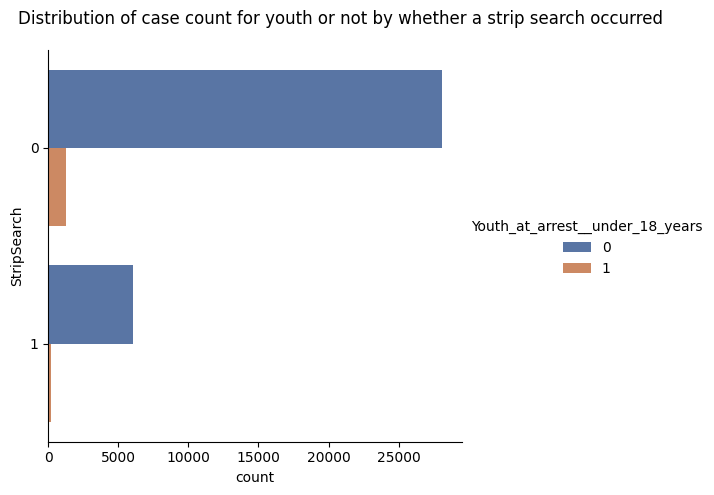

In [ ]:
StR = sns.catplot(y="StripSearch", hue="Youth_at_arrest__under_18_years", kind="count",
            palette="deep",
            data=df_without_XX)
StR.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
StR.fig.suptitle('Distribution of case count for youth or not by whether a strip search occurred')

In [ ]:
search_division_pct = pd.DataFrame(df_without_XX.groupby(['ArrestLocDiv', 'StripSearch'])['StripSearch'].count())
search_division_pct.columns = ['count']
search_division_pct['percent'] = search_division_pct['count'] / search_division_pct.groupby('ArrestLocDiv')['count'].transform('sum') * 100

# Calculate strip search percentages by sex
search_sex_pct = pd.DataFrame(df.groupby(['Sex', 'StripSearch'])['StripSearch'].count())
search_sex_pct.columns = ['count']
search_sex_pct['percent'] = search_sex_pct['count'] / search_sex_pct.groupby('Sex')['count'].transform('sum') * 100

# Calculate strip search percentages by youth arrest
search_youth_pct = pd.DataFrame(df.groupby(['Youth_at_arrest__under_18_years', 'StripSearch'])['StripSearch'].count())
search_youth_pct.columns = ['count']
search_youth_pct['percent'] = search_youth_pct['count'] / search_youth_pct.groupby('Youth_at_arrest__under_18_years')['count'].transform('sum') * 100
# Calculate strip search percentages by occurrence
search_o_pct = pd.DataFrame(df.groupby(['Occurrence_Category', 'StripSearch'])['StripSearch'].count())
search_o_pct.columns = ['count']
search_o_pct['percent'] = search_o_pct['count'] / search_o_pct.groupby('Occurrence_Category')['count'].transform('sum') * 100

# Calculate strip search percentages by youth arrest
sex_i_pct = pd.DataFrame(df.groupby(['Sex', 'ItemsFound'])['ItemsFound'].count())
sex_i_pct.columns = ['count']
sex_i_pct['percent'] = sex_i_pct['count'] / sex_i_pct.groupby('Sex')['count'].transform('sum') * 100

# Print the results
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
print("Strip search percentages by division:")
print(search_division_pct)
print("Strip search percentages by sex:")
print(search_sex_pct)
print("Strip search percentages by youth arrest:")
print(search_youth_pct)
print("Strip search percentages by age:")
print(search_o_pct)
print("Item Found percentages by sex:")
print(sex_i_pct)



Strip search percentages by division:
                          count    percent
ArrestLocDiv StripSearch                  
11           0             1567  87.590833
             1              222  12.409167
12           0             1617  85.015773
             1              285  14.984227
13           0              968  87.840290
             1              134  12.159710
14           0             2360  75.713827
             1              757  24.286173
22           0             1660  89.729730
             1              190  10.270270
23           0             1561  89.815880
             1              177  10.184120
31           0             1966  86.760812
             1              300  13.239188
32           0             1876  89.846743
             1              212  10.153257
33           0              865  90.575916
             1               90   9.424084
41           0             2280  86.363636
             1              360  13.636364
42           0  

## Research Questions

For ANCOVA:

1. Would difference in divisions affect the number of stripseach conducted when
account for the items found?
2. Would Sex affect the number of stripseach conducted when account for the items found?

For Logistic Regression:

1. How do factors of perceived race, sex, age, occurrence category, and the arrest location affect the number of strip search conducted?

## Data Preprocessing

### Ancova DF

In [ ]:
df_strip_wXX["ItemsFound"].unique()

array([ 0.,  1.])

In [ ]:
# creating df with columns we intested in
df_An = df_strip_wXX[['Perceived_Race', 'Sex', 'Arrest_Year', 'StripSearch', 'ItemsFound', 'Arrest_Month', 'ArrestLocDiv']].copy()


In [ ]:
# Checking the content
df_An.head(30)

,Perceived_Race,Sex,Arrest_Year,StripSearch,ItemsFound,Arrest_Month,ArrestLocDiv
12,Black,M,2021,1,0.0,Apr-June,53
14,Black,M,2020,1,0.0,Apr-June,53
33,White,M,2021,1,0.0,Jan-Mar,53
42,South Asian,F,2020,1,0.0,July-Sept,52
44,South Asian,F,2020,1,0.0,Oct-Dec,14
56,White,F,2021,1,1.0,July-Sept,22
58,White,F,2021,1,0.0,Jan-Mar,22
69,South Asian,M,2020,1,0.0,Jan-Mar,51
73,White,M,2020,1,0.0,Jan-Mar,54
84,Black,M,2020,1,0.0,Jan-Mar,53


In [ ]:
df_An_test = df_strip_wXX[[ 'Sex', 'StripSearch', 'ItemsFound', 'ArrestLocDiv']].copy()


### Logistic Regression DF

In [ ]:
df_LR = df_without_XX[['Perceived_Race', 'Sex', 'Youth_at_arrest__under_18_years', 'StripSearch', 'ItemsFound', 'Occurrence_Category', 'ArrestLocDiv']].copy()

In [ ]:
df_LR['Perceived_Race'].unique()

array(['White', 'Unknown or Legacy', 'South Asian', 'Black',
       'Middle-Eastern', 'Latino', 'East/Southeast Asian', 'Indigenous'],
      dtype=object)

In [ ]:
df_LR['Sex'].unique()

array(['M', 'F', 'U'], dtype=object)

In [ ]:
# drop cases with unknown sex

# Using Label Encoding and One-Hot Encoding to convert non-numerical varibables
#df_LR['Sex'] = 
df_LR['Perceived_Race'] = df_LR['Perceived_Race'].astype('category').cat.codes
df_LR['Occurrence_Category'] = df_LR['Occurrence_Category'].astype('category').cat.codes
df_LR = df_LR[df_LR['Sex'] != "U"]
df_LR['Sex'] = pd.get_dummies(df_LR.Sex, drop_first=True)

<ipython-input-81-cfb933c58644>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LR['Sex'] = pd.get_dummies(df_LR.Sex, drop_first=True)


In [ ]:
df_LR.groupby('Sex').size()

Sex
0     6271
1    29355
dtype: int64

In [ ]:
df_LR.head(30)


,Perceived_Race,Sex,Youth_at_arrest__under_18_years,StripSearch,ItemsFound,Occurrence_Category,ArrestLocDiv
0,7,1,0,0,0.0,1,54
1,7,1,0,0,0.0,1,54
2,6,1,0,0,0.0,1,54
5,5,1,0,0,0.0,0,42
6,0,1,0,0,0.0,0,52
9,0,1,0,0,0.0,7,14
10,0,1,0,0,0.0,7,51
12,0,1,0,1,0.0,24,53
14,0,1,0,1,0.0,16,53
15,6,1,0,0,0.0,16,53


## Supplymentary EDA

## ANCOVA


### Power analysis

In [ ]:
pip install penguins

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 2.5 MB/s eta 0:00:00


In [ ]:
pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=9da3726dd9ca275c140daa72bcad9a3fc8dc217868afd5cc97bea49971e624fc
  Stored in directory: /root/.cache/pip/wheels/04/bb/0d/2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built littleutils


In [ ]:
import pingouin as pg

In [ ]:
#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(sample1,sample2):
    #calculate the sample size
    n1, n2 = len(sample1), len(sample2)
    #calculate the variances
    var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

# function to calculate Cohen's d for independent samples
def Cohens_d(sample1, sample2):
    u1, u2 = np.mean(sample1), np.mean(sample2)
    s_pooled = pooled_standard_deviation(sample1, sample2)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

#### District

In [ ]:
df_An['ArrestLocDiv'].value_counts()

51    1411
14     757
43     571
52     530
41     360
31     300
53     295
12     285
55     268
42     259
54     233
11     222
32     212
22     190
23     177
13     134
33      90
Name: ArrestLocDiv, dtype: int64

In [ ]:
df_An['ArrestLocDiv'].unique()

array(['53', '52', '14', '22', '51', '54', '43', '12', '33', '55', '41',
       '31', '42', '32', '11', '23', '13'], dtype=object)

In [ ]:
# group data by category to create continuous variables
df_An_group = df_An.groupby(['Arrest_Year',
                             'Arrest_Month',
                             'ArrestLocDiv','Sex'])['StripSearch', 'ItemsFound'].sum().reset_index()
print(df_An_group)

     Arrest_Year Arrest_Month ArrestLocDiv Sex  StripSearch  ItemsFound
0           2020     Apr-June           11   F            7         5.0
1           2020     Apr-June           11   M           40        18.0
2           2020     Apr-June           12   F            5         2.0
3           2020     Apr-June           12   M           54        22.0
4           2020     Apr-June           13   F            2         1.0
..           ...          ...          ...  ..          ...         ...
228         2021      Oct-Dec           53   F            3         0.0
229         2021      Oct-Dec           53   M           14         1.0
230         2021      Oct-Dec           54   M            2         0.0
231         2021      Oct-Dec           55   F            1         0.0
232         2021      Oct-Dec           55   M            3         0.0

[233 rows x 6 columns]


<ipython-input-90-60bbc538c65a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_An_group = df_An.groupby(['Arrest_Year',


In [ ]:
df_An_group['ArrestLocDiv'].value_counts()
len(df_An_group['ArrestLocDiv'].unique())

17

In [ ]:
# calculate effect size
pg.power_anova(n=16, k= 17, power = 0.8, alpha = 0.05)

0.06934044322433755

In [ ]:
#calculate the sample size
pg.power_anova(eta_squared = 0.07, k=17, power=0.80)

15.84613362531817

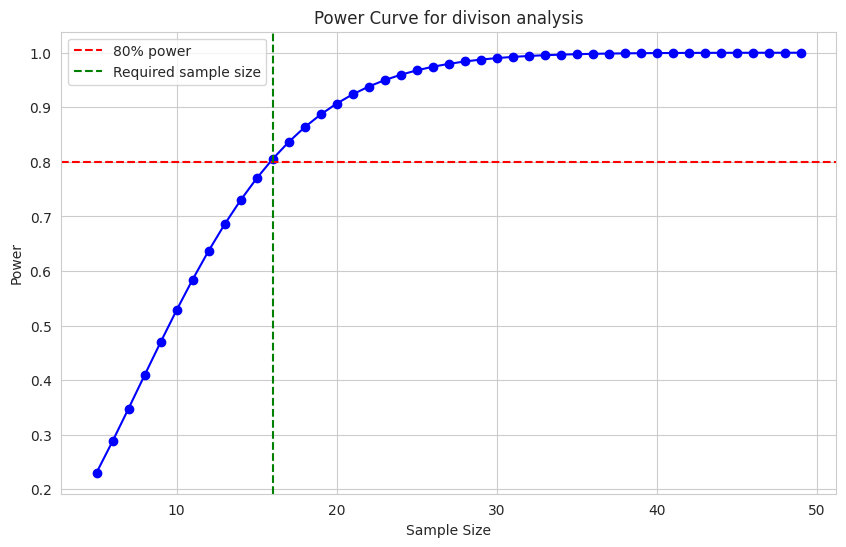

In [ ]:
# Define the range of sample sizes
sample_sizes = np.arange(5, 50)

# Calculate the power for each sample size
powers = [pg.power_anova(eta_squared=0.07, k=17, n=n) for n in sample_sizes]

# Create the power curve
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, powers, marker='o', linestyle='-', color='blue')
plt.axhline(y=0.8, color='red', linestyle='--', label='80% power')
plt.axvline(x=16, color='green', linestyle='--', label='Required sample size')
plt.xlabel('Sample Size')
plt.ylabel('Power')
plt.title('Power Curve for divison analysis')
plt.legend(loc='best')
plt.show()

#### Sex


In [ ]:
dt_male = df_An_group[df_An_group['Sex'] == 'M']['StripSearch']
dt_female = df_An_group[df_An_group['Sex'] == 'F']['StripSearch']

In [ ]:
dt_female

0       7
2       5
4       2
6      29
8       1
       ..
222     1
224     6
226     2
228     3
231     1
Name: StripSearch, Length: 103, dtype: int64

In [ ]:
#conduct power analysis 
from statsmodels.stats.power import TTestIndPower
effect_size = Cohens_d(dt_male,dt_female)
alpha = 0.05
power = 0.8
ratio_ =len(dt_male)/len(dt_female) #NB: ratio = nobs2/nobs1
print('Effect size (Cohen\'s D) for strip search:',effect_size)

Effect size (Cohen's D) for strip search: 0.655443203369


In [ ]:
#https://www.statsmodels.org/dev/generated/statsmodels.stats.power.TTestIndPower.solve_power.html
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for dt_male') 
print('Actual size of dt_male:', len(dt_male))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for dt_female')

print('Actual size of dt_female:', len(dt_female))

Sample Size of nobs1: 33.616 needed for dt_male
Actual size of dt_male: 130
Sample Size of nobs2: 42.428 needed for dt_female
Actual size of dt_female: 103


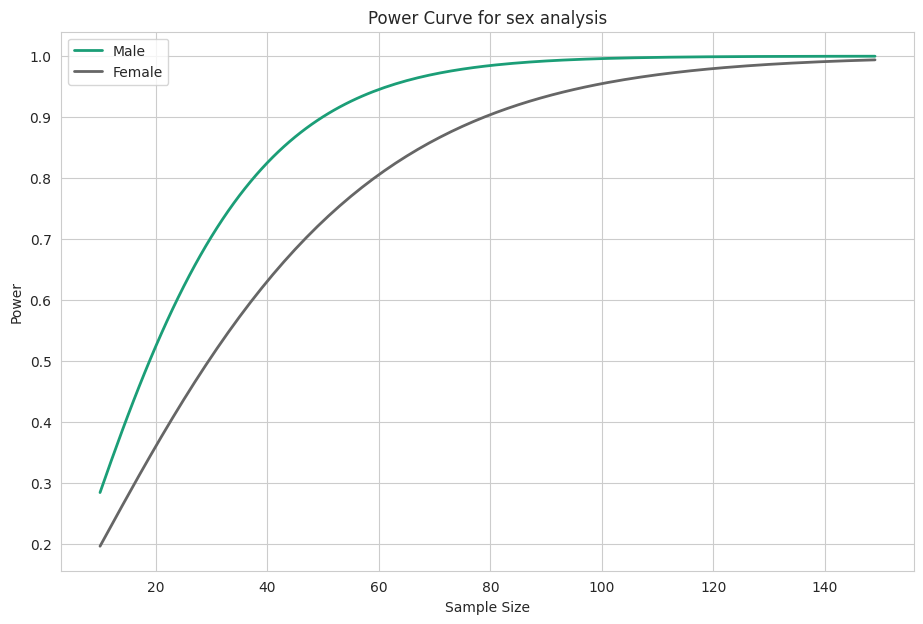

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower

effect_size_male = 0.655443203369
effect_size_female = 0.655443203369 / ratio_
alpha = 0.05
power = 0.8

analysis = TTestIndPower()

# Create an array of sample sizes to use for the x-axis of the power curve
sample_sizes = np.arange(10, 150, 1)

# Create the power curve
fig, ax = plt.subplots()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=[effect_size_male, effect_size_female], alpha=alpha, ax=ax)

# Set labels for lines
ax.get_lines()[0].set_label('Male')
ax.get_lines()[1].set_label('Female')

plt.xlabel('Sample Size')
plt.ylabel('Power')
plt.title('Power Curve for sex analysis')
plt.legend()
plt.show()

### Ancova


In [ ]:
from pingouin import ancova
pd.options.display.max_columns = None #show all columns in data

In [ ]:
df_An_group['ArrestLocDiv'].unique()

array(['11', '12', '13', '14', '22', '23', '31', '32', '33', '41', '42',
       '43', '51', '52', '53', '54', '55'], dtype=object)

In [ ]:
df_An_group['Sex'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
df_An_group['StripSearch'].unique()

array([  7,  40,   5,  54,   2,  23,  29, 183,   1,  30,   6,  28,  73,
         3,  41,  16,  12,  74,  11,  60, 103,  46, 270,   9,  77,  32,
        48,  10,  65,  19,  76,  14,  84,   8,  42,  36, 156,  64,  53,
        87,  71,  27,  34,  96,  44,  98, 336,  39, 199,  58,  26,  68,
        89,  17,  94, 141,  13,  66,  33,  80,  61,  25,  95,  79, 124,
        83, 371,  24, 110,  82,  63,  15,  43,   4,  72,  21,  56,  37])

In [ ]:
df_An_group['ItemsFound'].unique()

array([   5.,   18.,    2.,   22.,    1.,   12.,   20.,   62.,   14.,
          7.,    0.,   29.,    6.,    9.,   32.,  164.,    3.,   26.,
          4.,   17.,   34.,   44.,   60.,   28.,   19.,   10.,   36.,
         15.,   39.,   38.,   43.,   58.,  182.,   90.,    8.,   33.,
         13.,   16.,   11.,   48.,  196.,   41.,   24.,   21.])

In [ ]:
#isolate columns of interest into a new df
df_1way = df_An_group[['ArrestLocDiv', 'StripSearch','ItemsFound']].copy()
df_1way.head()

,ArrestLocDiv,StripSearch,ItemsFound
0,11,7,5.0
1,11,40,18.0
2,12,5,2.0
3,12,54,22.0
4,13,2,1.0


In [ ]:
#inspect the data is stored correctly in the df
df_1way.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ArrestLocDiv  233 non-null    object 
 1   StripSearch   233 non-null    int64  
 2   ItemsFound    233 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.6+ KB


In [ ]:
#what is the conditional proability of predicitng y = p(x_1|x_2)
ancova(data=df_1way, dv='StripSearch', covar='ItemsFound', between='ArrestLocDiv')

,Source,SS,DF,F,p-unc,np2
0,ArrestLocDiv,5871.131162,16,2.449179,2.000351e-03,0.154166
1,ItemsFound,434023.464652,1,2896.889149,9.719754e-127,0.930910
2,Residual,32212.155907,215,NaN,NaN,NaN


In [ ]:
#isolate columns of interest into a new df
df_1way_sex = df_An_group[['Sex', 'StripSearch','ItemsFound']].copy()
df_1way_sex.head()

,Sex,StripSearch,ItemsFound
0,F,7,5.0
1,M,40,18.0
2,F,5,2.0
3,M,54,22.0
4,F,2,1.0


In [ ]:
df_1way_sex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sex          233 non-null    object 
 1   StripSearch  233 non-null    int64  
 2   ItemsFound   233 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.6+ KB


In [ ]:
#what is the conditional proability of predicitng y = p(x_1|x_2)
ancova(data=df_1way_sex, dv='StripSearch', covar='ItemsFound', between='Sex')

,Source,SS,DF,F,p-unc,np2
0,Sex,4705.82812,1,32.427288,3.757714e-08,0.123567
1,ItemsFound,468852.81648,1,3230.807592,2.131562e-137,0.933542
2,Residual,33377.45895,230,NaN,NaN,NaN


## Logistic Regression

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
def perform_chi_square_test(dataframe, target, feature):
    contingency_table = pd.crosstab(dataframe[target], dataframe[feature])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"\n{target} vs {feature}:")
    print(f"Chi2 statistic: {chi2}")
    print(f"p-value: {p}")
    print(f"Degrees of freedom: {dof}")
    print("Expected Table:")
    print(expected)

### Chi-Square Tests

In [ ]:
# Target variable
target_variable = 'StripSearch'

# Categorical variables to compare
variables = ['Perceived_Race', 'Sex', 'Youth_at_arrest__under_18_years', 'ItemsFound', 'Occurrence_Category', 'ArrestLocDiv']

# Loop through the variables and perform the Chi-Square test
for var in variables:
    perform_chi_square_test(df_LR, target_variable, var)


StripSearch vs Perceived_Race:
Chi2 statistic: 311.2645244079143
p-value: 2.3737087002413072e-63
Degrees of freedom: 7
Expected Table:
[[  8239.07606804   1906.8352327     860.38118228    820.03794981
    1443.29972492   1564.32942233   2407.42064784  12090.61977208]
 [  1767.92393196    409.1647673     184.61881772    175.96205019
     309.70027508    335.67057767    516.57935216   2594.38022792]]

StripSearch vs Sex:
Chi2 statistic: 8.813561757569964
p-value: 0.002989997980069536
Degrees of freedom: 1
Expected Table:
[[  5163.11042497  24168.88957503]
 [  1107.88957503   5186.11042497]]

StripSearch vs Youth_at_arrest__under_18_years:
Chi2 statistic: 8.09340800025503
p-value: 0.004442654449187489
Degrees of freedom: 1
Expected Table:
[[ 28129.11300735   1202.88699265]
 [  6035.88699265    258.11300735]]

StripSearch vs ItemsFound:
Chi2 statistic: 12018.734221110504
p-value: 0.0
Degrees of freedom: 1
Expected Table:
[[ 27351.06495256   1980.93504744]
 [  5868.93504744    425.06495256

### Regressioning

In [ ]:
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor


#### Load and Split Data 

In [ ]:
#I select some random numerical features. Note, you will want to one hot encode non-numerical features 
#x = df_LR[['Perceived_Race', 'Sex', 'Youth_at_arrest__under_18_years', 'ItemsFound', 'Occurrence_Category', 'ArrestLocDiv']].copy()
x = df_LR[[ 'Perceived_Race','Sex','Youth_at_arrest__under_18_years', 'Occurrence_Category',  'ArrestLocDiv']].copy()
x['ArrestLocDiv'] = x['ArrestLocDiv'].astype(int)
# Select the response column 
y = df_LR['StripSearch']
print(y)

0        0
1        0
2        0
5        0
6        0
        ..
65262    0
65263    0
65265    0
65268    0
65272    0
Name: StripSearch, Length: 35630, dtype: int64


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35626 entries, 0 to 65272
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Perceived_Race                   35626 non-null  int8 
 1   Sex                              35626 non-null  uint8
 2   Youth_at_arrest__under_18_years  35626 non-null  int64
 3   Occurrence_Category              35626 non-null  int8 
 4   ArrestLocDiv                     35626 non-null  int64
dtypes: int64(2), int8(2), uint8(1)
memory usage: 939.4 KB


In [ ]:
y.unique()

array([0, 1])

In [ ]:
# Split these data into training and testing datasets
#set random seed for replicability 
#you may want to consider stratifying your train test split (creates splits by preserving the same percentage for each target class as in the complete set.)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=123)

#### Regression

In [ ]:
y_train

11303    0
38937    0
55915    1
22512    0
6454     0
        ..
13615    0
27070    0
31191    0
49827    0
27637    1
Name: StripSearch, Length: 28500, dtype: int64

In [ ]:
#building the model with statsmodels
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
# Create the formula string 
all_columns = ' + '.join(x)
formula = "StripSearch ~ " + all_columns 
print("Formula: ", formula, "\n")

# Put the training predictors and responses into one DataFrame to be input into the model
trainingdata = pd.concat([x_train,y_train], axis = 1)
#scale the data set
#scaler = StandardScaler()
#trainingdata_scaled = scaler.fit_transform(trainingdata)
# Build the model
log_reg_1 = smf.logit(formula, data=trainingdata).fit()

Formula:  StripSearch ~ Perceived_Race + Sex + Youth_at_arrest__under_18_years + Occurrence_Category + ArrestLocDiv 

         Current function value: 0.355221
         Iterations: 35


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
 # Calculate VIF for each feature to check multicollinearity
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(trainingdata.values, i) for i in range(trainingdata.shape[1])]
vif["Features"] = trainingdata.columns

print(vif)

TypeError: ignored

In [ ]:

log_reg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            StripSearch   No. Observations:                28500
Model:                          Logit   Df Residuals:                    28494
Method:                           MLE   Df Model:                            5
Date:                Fri, 14 Apr 2023   Pseudo R-squ.:                0.007495
Time:                        03:11:00   Log-Likelihood:                -13156.
converged:                       True   LL-Null:                       -13256.
Covariance Type:            nonrobust   LLR p-value:                 5.416e-41
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -2.1646      0.062    -34.813      0.000      -2.286      -2.043
Perceived_Race                     -0.0033      0.005     -0.634      0.526      -0.013       0.007
Sex                                 0.1248      0.042      2.963      0.003       0.042       0.207
Youth_at_arrest__under_18_years    -0.3038      0.087     -3.497      0.000      -0.474      -0.133
Occurrence_Category                 0.0041      0.002      2.642      0.008       0.001       0.007
ArrestLocDiv                        0.0135      0.001     12.951      0.000       0.011       0.016
===================================================================================================
"""

In [ ]:
#getting odds ratio 
np.exp(log_reg_1.params)

Intercept                          0.114794
Perceived_Race                     0.996750
Sex                                1.132899
Youth_at_arrest__under_18_years    0.738037
Occurrence_Category                1.004066
ArrestLocDiv                       1.013630
dtype: float64

In [ ]:
params = log_reg_1.params
conf = log_reg_1.conf_int()
conf['OR'] = params
conf.columns = ["Lower CI", "Upper CI", "OR"]
np.exp(conf)

,Lower CI,Upper CI,OR
Intercept,0.101623,0.129671,0.114794
Perceived_Race,0.986772,1.006828,0.996750
Sex,1.043136,1.230386,1.132899
Youth_at_arrest__under_18_years,0.622487,0.875037,0.738037
Occurrence_Category,1.001048,1.007094,1.004066
ArrestLocDiv,1.011556,1.015709,1.013630


#### Prediction Interval Plot


Optimization terminated successfully.
         Current function value: 0.463579
         Iterations 6


Text(0.5, 1.0, 'Prediction Interval Plot')

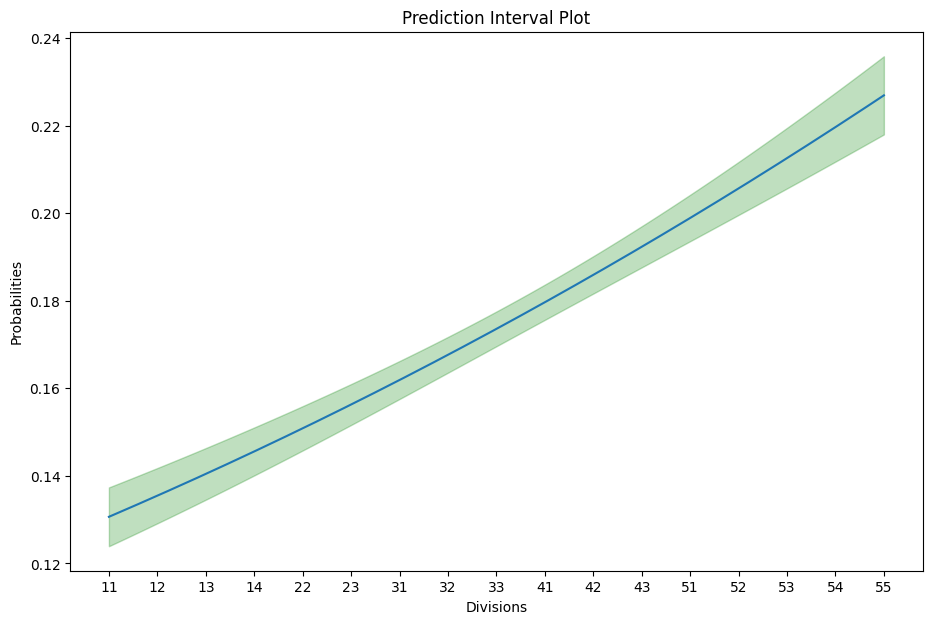

In [ ]:
pre_df = df_LR.copy()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
pre_df['ArrestLocDiv'] = le.fit_transform(pre_df['ArrestLocDiv'])


mod = sm.Logit.from_formula('StripSearch ~ ArrestLocDiv', pre_df)
res = mod.fit()

# Computes the marginal effects of the logistic regression model.
me = res.get_margeff()

# cumulative distribution function
Λ = lambda x: stats.logistic().cdf(x)
# probability density function
λ = lambda x: stats.logistic().pdf(x)

# estimated parameters (β) 
β_ = res.params.values.reshape(-1, 1)

# covariance matrix (V_) 
V_ = res.cov_params().values

def var_π(x, β, V_):
    prob = λ(x.T.dot(β))**2 * x.T.dot(V_).dot(x)
    return prob

def var_πs(xx, β, V_):
    α = λ(xx.dot(β))**2
    out = np.empty((500, 1))
    for i, x in enumerate(xx):
        out[i] = x.T.dot(V_).dot(x)
    return α * out


xx = sm.add_constant(np.linspace(pre_df.ArrestLocDiv.min(), pre_df.ArrestLocDiv.max(), 500).reshape(-1, 1))
# predicted probabilities
πs = Λ(xx.dot(β_))
vv = np.sqrt(var_πs(xx, β_, V_))

x = ['11', '12', '13', '14', '22', '23', '31', '32', '33', '41', '42',
       '43', '51', '52', '53', '54', '55']
default_x_ticks = range(len(x))

plt.rcParams['figure.figsize'] = [11, 7]
plt.plot(xx[:, 1], πs)
plt.fill_between(xx[:, 1], (πs - 1.96*vv).ravel(), (πs + 1.96*vv).ravel(), alpha=.25, color='g')
plt.xticks(default_x_ticks, x)
plt.xlabel('Divisions')
plt.ylabel('Probabilities')
plt.title('Prediction Interval Plot')

#### Assess the model


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Predict responses 
pred_1 = log_reg_1.predict(x_test)
# round() rounds to nearest integer;
# 0.5 rounds to 0; 0.501 rounds to 1
prediction_1 = list(map(round, pred_1))

In [ ]:
# Accuracy score
print('\nTest accuracy = ', accuracy_score(y_test, prediction_1))


Test accuracy =  0.8380578164468144



Confusion Matrix : 
 [[5756  150]
 [1004  216]]


216 5756 150 1004


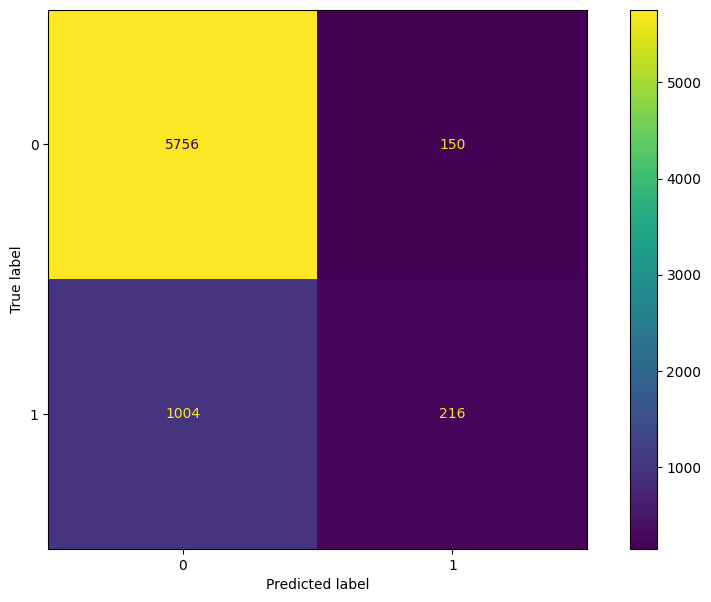

In [ ]:
# Confusion matrix
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
#C0,0 is true negative, C1,0 is false negative, C1,1 is true positive, C0,1 false positive 
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, prediction_1) 
print ("\nConfusion Matrix : \n", cm) 

tn, fp, fn, tp = confusion_matrix(y_test, prediction_1).ravel()
print('\n')
print(tp, tn, fp, fn)

ConfusionMatrixDisplay.from_predictions(y_test, prediction_1)
plt.show()